das ist ein test


# Cycling Network Analysis – Graz

Course: GIS Analysis Techniques 2  
Group: 1  
Authors: ...  


In [63]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
import pandas as pd
import sys
import matplotlib.pyplot as plt
import json


print(sys.executable) #environment sanity check


c:\Users\kosch\Desktop\GIS2\venv-gst200b\Scripts\python.exe


In [ ]:
## Data ##
place = "Graz, Austria"
main_crs = "EPSG:31256"

In [ ]:
## city and districts
gdf_boundaries = ox.features_from_place(
    place,
    tags={"boundary": "administrative"}
)

df_districts = gdf_boundaries[gdf_boundaries["admin_level"] == "9"]
df_districts = df_districts.to_crs(main_crs)

#df_districts.plot(edgecolor="black", figsize=(8, 8))
#plt.show()


In [ ]:
## main University 
poi = [
    "Universitätsplatz 3, 8010 Graz",      
    "Rechbauerstraße 12, 8010 Graz",      
    "Neue Stiftingtalstraße 6, 8010 Graz",
    "Leonhardstraße 15, 8010 Graz",        
    "Körblergasse 126, 8010 Graz",        
    "Alte Poststraße 149, 8010 Graz",
    "Hasnerplatz 12, 8010 Graz"   
]

coords = [ox.geocode(addr) for addr in poi]
uni_points = [Point(lon, lat) for lat, lon in coords]

graz_unis = gpd.GeoDataFrame(
    {'name': poi},
    geometry=uni_points,
    crs="EPSG:4326"
).to_crs(main_crs)

#graz_unis.plot(figsize=(10,10), color="red", markersize=50, alpha=0.9)
#plt.show()


In [ ]:
## Road network
G = ox.graph_from_place(
    place,
    network_type="bike",     
    simplify=True,
    retain_all=True           
)

G = ox.project_graph(G, to_crs=main_crs)

G_simple = nx.DiGraph(G)

#stats_json = ox.stats.basic_stats(G)
#print(json.dumps(stats_json, indent=2))

#fig, ax = ox.plot_graph(
#    G,
#    node_size=1,              
#    bgcolor="#040615",
#    edge_color="#d44e5c",
#    edge_linewidth=0.8
#)
#plt.show()

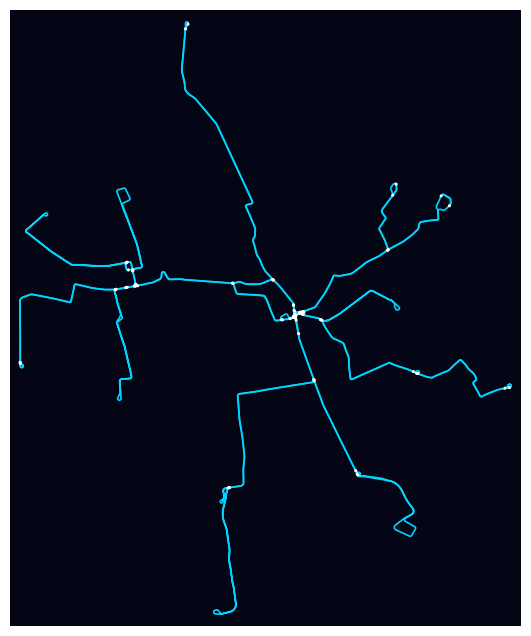

In [ ]:
## Tram network

tram = ox.graph_from_place(
    place,
    custom_filter='["railway"="tram"]["service"!="yard"]["service"!="siding"]["service"!="spur"]',
    simplify=True,
    retain_all=True
)

tram = ox.project_graph(tram, to_crs=main_crs)

comps = list(nx.weakly_connected_components(tram))
sizes = sorted([(i, len(c)) for i, c in enumerate(comps)], key=lambda x: x[1], reverse=True)
largest_idx = sizes[0][0]
largest_nodes = comps[largest_idx]
tram_main = tram.subgraph(largest_nodes).copy()

#stats_json = ox.stats.basic_stats(tram_main)
#print(json.dumps(stats_json, indent=2))

#fig, ax = ox.plot_graph(
#    tram_main,
#    node_size=5,
#    bgcolor="#040615",
#    edge_color="#00d4ff",
#    edge_linewidth=1.2
#)
